<a href="https://colab.research.google.com/github/sarasame00/laboElectro/blob/main/5.RaigsCatodics/catodics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import funclab as fl

#Desviació electrostàtica

In [12]:
# valors extrets de les imatges utilitzant PlotDigitizer

xE1 = np.array([0.9855072463768116, 1.4782608695652173, 1.9855072463768115, 2.5362318840579707, 3, 3.4927536231884058, 4.0144927536231885, 4.521739130434783, 5, 5.507246376811595, 5.9855072463768115, 6.478260869565218, 6.956521739130435, 7.434782608695652, 7.91304347826087, 8.376811594202898, 8.840579710144928])
yE1 = np.array([-0.08955223880597019, -0.05970149253731338, -0.05970149253731338, -0.014925373134328401, 0, 0.04477611940298509, 0.10447761194029848, 0.16417910447761197, 0.19402985074626866, 0.26865671641791045, 0.3731343283582089, 0.4328358208955224, 0.5223880597014925, 0.6119402985074627, 0.7164179104477613, 0.8208955223880597, 0.8955223880597015])

xE2 = np.array([1, 1.457142857142857, 2, 2.5142857142857142, 3.0285714285714285, 3.557142857142857, 4.0285714285714285, 4.514285714285714, 5.014285714285714, 5.557142857142857, 6.0285714285714285, 6.557142857142857, 7.042857142857143, 7.571428571428571, 8, 8.485714285714286])
yE2 = np.array([-0.13043478260869557, -0.08695652173913038, -0.02898550724637672, 0.05797101449275366, 0.14492753623188404, 0.30434782608695654, 0.4347826086956522, 0.6376811594202898, 0.8405797101449275, 1.1304347826086956, 1.3623188405797102, 1.6666666666666665, 1.9420289855072463, 2.246376811594203, 2.5072463768115942, 2.8115942028985508])

xE3 = np.array([1, 1.5217391304347827, 2.0144927536231885, 2.5362318840579707, 3.028985507246377, 3.579710144927536, 4.057971014492754, 4.594202898550725, 5.028985507246377, 5.550724637681159, 6.072463768115942])
yE3 = np.array([-0.08695652173913038, -0.02898550724637672, 0.04347826086956519, 0.2028985507246377, 0.37681159420289856, 0.5942028985507246, 0.855072463768116, 1.2753623188405796, 1.63768115942029, 2.0724637681159424, 2.579710144927536])

xE4 = np.array([0.9850746268656716, 1.5074626865671643, 2, 2.5373134328358207, 3.029850746268657, 3.5970149253731343, 4.074626865671641, 4.567164179104477, 5.08955223880597])
yE4 = np.array([-0.05797101449275366, 0.04347826086956519, 0.1594202898550725, 0.34782608695652173, 0.6086956521739131, 0.9710144927536232, 1.391304347826087, 1.9420289855072463, 2.5652173913043477])


In [13]:
Vp = [1000, 2000, 3000, 4000] # valors de potencial entre plaques (V)
d = 0.054 # distancia entre plaques (m)
Va = 4000 # potencial d'acceleracio (V)

$1000 \pm 0,2$ &
            $1.12252557139362 \pm 0.232593500850003$ &
            $1.2992194113352038 \pm 0.012406984066866814$ &
            $-0.0010693836447611287 \pm 4.843716603267085e-05$ &
            $0.9986339549201027$\ \ \hline
$2000 \pm 0,2$ &
            $1.83820643956989 \pm 0.208891060738746$ &
            $4.2551074990043665 \pm 0.03579804618172879$ &
            $-0.002071887380908662 \pm 0.00012897086173525141$ &
            $0.9990100905356064$\ \ \hline
$3000 \pm 0,2$ &
            $2.16249642353375 \pm 0.192809359674958$ &
            $7.508668137269982 \pm 0.19322573968449602$ &
            $-0.0026987071184654834 \pm 0.00036744823529650926$ &
            $0.9940753060513752$\ \ \hline
$4000 \pm 0,2$ &
            $2.26241800952626 \pm 0.185110448557327$ &
            $10.474157451510472 \pm 0.3850637029886904$ &
            $-0.002684023439894917 \pm 0.00052874715615494$ &
            $0.9906279289524672$\ \ \hline


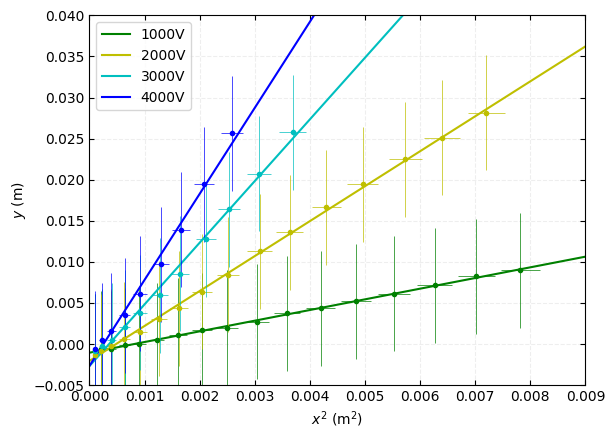

In [14]:
lista = [[xE1, yE1, 1000],
         [xE2, yE2, 2000],
         [xE3, yE3, 3000],
         [xE4, yE4, 4000]]

u = np.arange(0, 0.1, 0.001)

# creem la figura
fig = plt.figure()
ax = fig.add_subplot()
colors = ['g', 'y', 'c', 'b', 'm', 'r', '#ff870c', '#ffd645']

num = 0

ks, iks = [], []

# per cada valor del potencial entre les plaques del condensador
for v in lista:

  color = colors[num]

  # regressio lineal: ajust de les dades a la recta y = A*X +B
  A, B, R2 = fl.regressio((v[0]/100)*(v[0]/100), v[1]/100, graf=True)

  # representacio de les dades experimentals
  x = fl.Variable('x', (v[0]/100)*(v[0]/100), 2*0.002*v[0]/100)
  y = fl.Variable('y', v[1]/100, 0.007)

  fl.plotDades(ax, x, y, color = color)

  # variables involucrades al calcul de la incertesa de k
  d_sim = fl.Variable('d', d, 0.001)
  A_sim = A
  Va_sim = fl.Variable('Va', Va, 200)
  Vp_sim = fl.Variable('Vp', v[2], 200)

  # expressio de k
  ksim = 4*d_sim.sim*A_sim.sim*Va_sim.sim/Vp_sim.sim

  # calcul de k i incertesa de k
  k, ik = fl.propIncertesa(ksim, [d_sim, A_sim, Va_sim, Vp_sim])

  ks.append(k)
  iks.append(ik)

  print(f'''${v[2]} \pm 0,2$ &
            ${k} \pm {ik}$ &
            ${A.val} \pm {A.inc}$ &
            ${B.val} \pm {B.inc}$ &
            ${R2}$\\ \\ \hline''')

  # representacio de la regresio lineal

  ax.plot(u, A.val*u + B.val, label = str(v[2])+'V', c=color)

  num +=1

plt.xlabel('$x^2$ (m$^2$)')
plt.ylabel('$y$ (m)')
plt.xlim(0, 0.009)
plt.ylim(-0.005, 0.04)
plt.legend()

(0.0, 2.6)

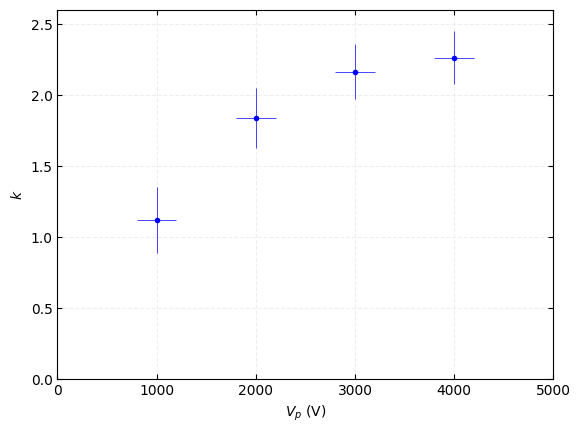

In [15]:
kss = fl.Variable('ks', np.array(ks), np.array(iks))
vps = fl.Variable('vps', np.array(Vp), 200)

fig = plt.figure()
ax = fig.add_subplot()

fl.plotDades(ax, vps, kss, color = 'b')

plt.xlabel('$V_p$ (V)')
plt.ylabel('$k$')
plt.xlim(0, 5000)
plt.ylim(0, 2.6)

#Magnetostàtica

##Variant $V_a$


In [16]:
# valors extrets de les imatges utilitzant PlotDigitizer

x2kV = np.array([1.0185182568791784, 0.537036513758357, 1.472221908255014, 1.9814817431208214, 2.4722233211074505, 2.9722240275336684, 3.462965605520297, 3.9444473486411185, 4.398151706443173, 4.888892578003583, 5.388893284429801, 5.87037573397684, 6.333339220218483, 6.842599055084291, 7.287043578020537, 7.740747935822591])
y2kV = np.array([-0.19266038349951178, -0.13761465963455904, -0.24770610736446452, -0.33027504313407086, -0.4403668408361535, -0.541284117912626, -0.6880732981727953, -0.7706418839702244, -0.9174310642303938, -1.0917427564508622, -1.3027518312294173, -1.4954125647011063, -1.7064219894518386, -1.9724764381231692, -2.220183245431988, -2.4862383940476733])

x3kV = np.array([1.02803763640201, 0.4953282489775197, 1.5233644593261042, 2.009344928098386, 2.5140173921475792, 3.0280354973218717, 3.467287760468658, 3.971960224517851, 4.485978329692143, 4.953267516214227, 5.457939267236708, 5.953266090160802, 6.392517640280875, 6.934573381857178, 7.401862568379261])
y3kV = np.array([-0.2222223792056599, -0.16666660779787756, -0.34259268743675286, -0.4074075774727982, -0.5185184138628934, -0.6296296034657234, -0.7407414994940228, -0.8981482822381679, -1.0740740086643084, -1.2592592069314468, -1.4629629956678458, -1.6759262562452428, -1.879629691768907, -2.2222227324183947, -2.481481586137107])

x4kV =np.array( [1.0144927536231885, 1.5362318840579712, 2, 2.5072463768115942, 3.0144927536231885, 3.463768115942029, 4.0144927536231885, 4.55072463768116, 5, 5.507246376811595, 5.9855072463768115, 6.449275362318841, 6.826086956521739])
y4kV = np.array([-0.3623188405797102, -0.4492753623188406, -0.536231884057971, -0.6666666666666667, -0.8115942028985508, -0.9420289855072463, -1.1304347826086958, -1.347826086956522, -1.5507246376811596, -1.8115942028985508, -2.057971014492754, -2.36231884057971, -2.608695652173913])

x5kV = np.array([1, 1.5384615384615385, 2.0307692307692307, 2.5846153846153848, 3.076923076923077, 3.6461538461538465, 4.092307692307692, 4.630769230769231, 5.1230769230769235, 5.630769230769231, 6])
y5kV = np.array([-0.4117647058823528, -0.5294117647058822, -0.6470588235294117, -0.8235294117647058, -0.9852941176470589, -1.2352941176470589, -1.441176470588235, -1.7352941176470589, -2.014705882352941, -2.3676470588235294, -2.661764705882353])

$5000 \pm 0,2$ &
            $-0.142241100861573 \pm 0.00152468694400594$ &
            $-7.030316792705258 \pm 0.07535819226044241$ &
            $-0.003879583605590467 \pm 0.00023867514106269607$ &
            $0.998394016227362$\ \ \hline
$4000 \pm 0,2$ &
            $-0.133811776035822 \pm 0.00193606782704050$ &
            $-7.473183823016409 \pm 0.10812643844909646$ &
            $-0.004903700104716746 \pm 0.00031471664388133994$ &
            $0.997285964578778$\ \ \hline
$3000 \pm 0,2$ &
            $-0.117710932144393 \pm 0.00125559718038185$ &
            $-8.4953876567159 \pm 0.09061847182501775$ &
            $-0.007367702208559567 \pm 0.00024759876448159155$ &
            $0.998749981239433$\ \ \hline
$2000 \pm 0,2$ &
            $-0.0944586168172057 \pm 0.00130954284332506$ &
            $-10.586646657500596 \pm 0.14676974777187096$ &
            $-0.008242249638492126 \pm 0.0003291108014200242$ &
            $0.998273175573963$\ \ \hline


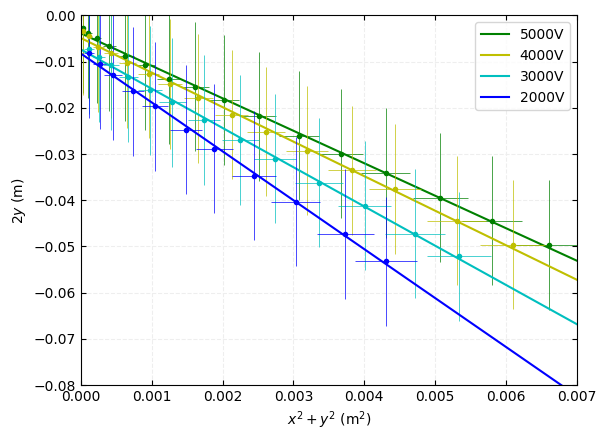

In [17]:
lista = [[x2kV, y2kV, 5000],
         [x3kV, y3kV, 4000],
         [x4kV, y4kV, 3000],
         [x5kV, y5kV, 2000]]

u = np.arange(0, 0.0075, 0.0001)

# creem la figura
fig = plt.figure()
ax = fig.add_subplot()

num = 0

Vas = []
Rs = []
iRs = []

# per cada valor del potencial entre les plaques del condensador
for v in lista:

  color = colors[num]

  # variables involucrades al calcul de la incertesa de X
  vx = fl.Variable('x', v[0]/100, 0.002)
  vy = fl.Variable('y', v[1]/100, 0.007)

  # expressio de X
  X_sim = vx.sim*vx.sim + vy.sim*vy.sim

  # calcul de X = x^2 + y^2 i la incertesa de X
  X, iX = fl.propIncertesa(X_sim, [vx, vy])

  # per la regresio lineal Y = 2y
  Y = 2*v[1]/100

  vY = fl.Variable('Y', 2*v[1]/100, 2*0.007)
  vX = fl.Variable('X', X, iX)

  # regressio lineal: ajust de les dades a la recta y = A*X +B
  A, B, R2 = fl.regressio(X, Y, graf=True)

  # representacio de les dades experimentals
  fl.plotDades(ax, vX, vY, color = color)

  # representacio de la regresio lineal
  plt.plot(u, A.val*u + B.val, label = str(v[2])+ 'V', c=color)

  # calcul del radi de curvatura
  R_sim = 1/A.sim
  R, iR = fl.propIncertesa(R_sim, [A])

  Vas.append(v[2])
  Rs.append(R*R)
  iRs.append(iR)

  print(f'''${v[2]} \pm 0,2$ &
            ${R} \pm {iR}$ &
            ${A.val} \pm {A.inc}$ &
            ${B.val} \pm {B.inc}$ &
            ${R2}$\\ \\ \hline''')
  num += 1

plt.xlabel('$x^2+y^2$ (m$^2$)')
plt.ylabel('$2y$ (m)')
plt.xlim(0,0.007)
plt.ylim(-0.08,0)
plt.legend()

### $R$ vs $V_a$

A = 3.798002934475394e-06 \pm 4.163718683982363e-07
B =  0.0019360937324485036 \pm 0.0015298479414088497
q/m = 2941053193483.90 \pm 670782943918.447


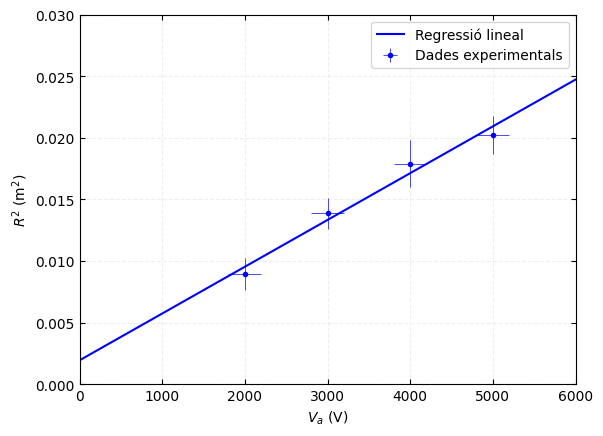

In [18]:
# regressio lineal: ajust de les dades a la recta y = A*X +B
A, B, R2 = fl.regressio(Vas, Rs, graf=True)

vRs = fl.Variable('Rs', Rs, iRs)
vVas = fl.Variable('Vs', Vas, 200)

# creem la figura
fig = plt.figure()
ax = fig.add_subplot()

fl.plotDades(ax,  vVas, vRs, label = 'Dades experimentals', color='b')


u = np.arange(0, 7000, 1)

# representacio de la regresio lineal
plt.plot(u, A.val*u + B.val,label = 'Regressió lineal', c='b')

plt.xlabel('$V_a$ (V)')
plt.ylabel('$R^2$ (m$^2$)')
plt.xlim(0,6000)
plt.ylim(0,0.030)
plt.legend()

print(f'A = {A.val} \pm {A.inc}')
print(f'B =  {B.val} \pm {B.inc}')

K = 32*np.pi*320*10**(-7)/(5*np.sqrt(5)*0.068)
vI = fl.Variable('I', 0.100, 0.010)
qm_sim = 2/(K**2*vI.sim**2*A.sim)
qm, iqm = fl.propIncertesa(qm_sim, [vI,A])

print(f'q/m = {qm} \pm {iqm}')

##Variant $I$

In [19]:
# valors extrets de les imatges utilitzant PlotDigitizer

xM100 = np.array([1.0086212112841317, 1.5, 1.9913787887158683, 2.5086205535780524, 2.999999342293921, 3.4913781310097893, 4.034481556606131, 9.103444340965355, 8.620686105827538, 8.120686434680579, 7.594824773946421, 7.103445327524473, 6.663790517982999, 6.077583666790315, 5.612067196514684, 5.051722663762237, 4.551722663762236])
yM100 = np.array([-0.18644075467647972, -0.21186442047794282, -0.22033919126473064, -0.3050849594559078, -0.3135594069632454, -0.34745784355149634, -0.42372884095588564, -1.432204258301574, -1.2796612936544447, -1.1694918596618045, -1.0084754173456882, -0.9406782208897363, -0.8644069002058967, -0.7033901346103303, -0.652542479727954, -0.5677967115367768, -0.48305094334559967])

xM200 = np.array([1.0406504468472582, 1.520325223423629, 1.9512202081152028, 2.463415466224699, 2.9105703815445385, 3.4471567761496207, 3.902441656783593, 4.357726537417566, 4.886182346431921, 5.333337261751761, 5.861793070766116, 6.398378845094605, 6.821143864472046, 7.357729638800534, 7.788624313353811, 8.219518987907087, 8.707324350074185])
yM200 = np.array([-0.2857143343711353, -0.3660712673956144, -0.4107141214974184, -0.4642857507783515, -0.5892855379046347, -0.7142856656288648, -0.8571426625154589, -0.955357145898196, -1.1517857720657232, -1.3124999787126284, -1.4910713951198447, -1.7053568904497358, -1.946428370719067, -2.1607142066469054, -2.4107144620953656, -2.660714036347932, -2.928571160958756])

xM300 = np.array([1.0088487568799658, 1.5663717531152268, 2.0177002144334795, 2.566373103452001, 3.0353997536985724, 3.575223885837128, 4.1681446102658, 4.663720231825818, 5.194694256747633, 5.716818849621096, 6.256642306591264, 6.814165302826526, 7.309740924386542])
yM300 = np.array([-0.25, -0.35833326975504554, -0.4666668574015299, -0.6000000635782877, -0.7333332697550455, -0.8833335240681965, -1.1000006993611653, -1.2833334604899087, -1.5, -1.75, -2.0666669209798174, -2.375, -2.6666666666666665])

xM400 = np.array([0.9818184592507102, 1.5363644686612217, 2.027273004705256, 2.5545460094105117, 3.1181820956143467, 3.654545870694247, 4.181818875399503, 4.736364191228693, 5.300000277432528, 5.845454822887074, 6.400000138716265])
yM400 = np.array([-0.3223142163381298, -0.4380165211091502, -0.5702481319015291, -0.7355374089437954, -0.9421490052466281, -1.1404959485387818, -1.4132235078699422, -1.6776864141904235, -2.04132294978912, -2.404958854859263, -2.8512400289790927])

xM500 = np.array([0.9913038170855978, 1.4869557256283967, 2.0260858950407608, 2.486956389054008, 3.034782077955163, 3.5652167278787363, 4.104347560716712, 4.599999469259511, 5.121738599694293])
yM500 = np.array([-0.4396549541233416, -0.5948272715284535, -0.8017245716769964, -0.9999996711468523, -1.2672411950391844, -1.586206386262357, -1.9482753461097164, -2.405172070765251, -2.931033904430671])

xM600 = np.array([1.0350872026876898, 1.5, 2.02631607126126, 2.57894821378378, 3.0877200144557024, 3.60526428504504, 4.1315803563063, 4.65789642756756])
yM600 = np.array([-0.5, -0.6833333969116211, -0.9083334604899088, -1.2333332697550454, -1.5499998728434243, -1.9499998092651367, -2.4833332697550454, -3.058333396911621])

xM700 = np.array([0.9823011598026891, 1.4601765968048375, 2.0088487449311803, 2.5309726327615563, 3.017698165029836, 3.460175921637362, 3.7610609311639753])
yM700 = np.array([-0.5652173913043478, -0.7913042151409646, -1.078260670537534, -1.4782608695652173, -1.8695652173913042, -2.3565216064453125, -2.730434915293818])

xM800 = np.array([1.0265476209766715, 1.5132738104883359, 2.061948049843631, 2.513275835993497, 3.079647589108724])
yM800 = np.array([-0.6637168589713077, -0.9469027863158359, -1.3362831410286922, -1.7168144102393232, -2.353982324784697])

$100 \pm 10$ &
            $-0.341880957364333 \pm 0.00356258358482462$ &
            $-2.924994734159256 \pm 0.030480019437026832$ &
            $-0.003587859099043027 \pm 0.00012745976470513194$ &
            $0.998373834448533$\ \ \hline
$200 \pm 10$ &
            $-0.157872982758226 \pm 0.00163353267446098$ &
            $-6.334206034046033 \pm 0.06554086926468079$ &
            $-0.0061938019415968115 \pm 0.0002700128011115449$ &
            $0.998396627659559$\ \ \hline
$300 \pm 10$ &
            $-0.124829424729882 \pm 0.00217571961062777$ &
            $-8.010931734756419 \pm 0.13962686531982038$ &
            $-0.006105653881604108 \pm 0.0004178193941674359$ &
            $0.996669451710948$\ \ \hline
$400 \pm 10$ &
            $-0.0961745930288645 \pm 0.00160890957367057$ &
            $-10.397756502071957 \pm 0.17394458821217107$ &
            $-0.006919270740747345 \pm 0.00042180379180345847$ &
            $0.997487578144397$\ \ \hline
$500 \pm 10$ &
            $-0.0685539

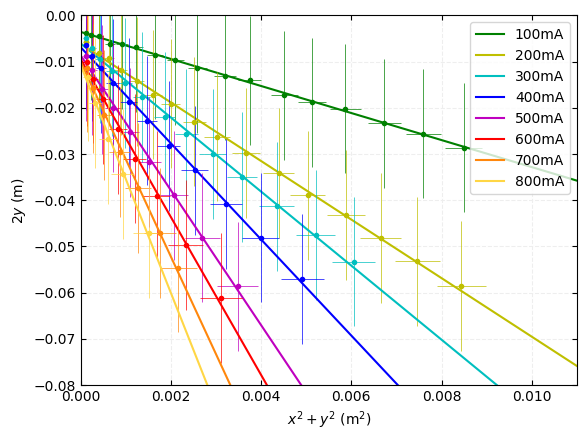

In [20]:
lista = [[xM100, yM100, 100],
         [xM200, yM200, 200],
         [xM300, yM300, 300],
         [xM400, yM400, 400],
         [xM500, yM500, 500],
         [xM600, yM600, 600],
         [xM700, yM700, 700],
         [xM800, yM800, 800]]

u = np.arange(0, 0.2, 0.001)

# creem la figura
fig = plt.figure()
ax = fig.add_subplot()

num = 0

Is = []
iIs =[]
Rs = []
iRs = []

# per cada valor del potencial entre les plaques del condensador
for v in lista:

  color = colors[num]

  # variables involucrades al calcul de la incertesa de X
  vx = fl.Variable('x', v[0]/100, 0.002)
  vy = fl.Variable('y', v[1]/100, 0.007)

  # expressio de X
  X_sim = vx.sim*vx.sim + vy.sim*vy.sim

  # calcul de X = x^2 + y^2 i la seva incertesa
  X, iX = fl.propIncertesa(X_sim, [vx, vy], val=True)

  # per la regresio lineal Y = 2y
  Y = 2*v[1]/100

  # regressio lineal: ajust de les dades a la recta y = A*X +B
  A, B, R2 = fl.regressio(X, Y, graf=True)

  vX = fl.Variable('X', X, iX)
  vY = fl.Variable('Y', Y, 2*0.007)

  fl.plotDades(ax, vX, vY, color = color)

  # representacio de la regresio lineal
  plt.plot(u, A.val*u + B.val,label = str(v[2])+'mA', c=color)

  # calcul del radi de curvatura
  R_sim = 1/A.sim

  R, iR = fl.propIncertesa(R_sim, [A])

  Is.append(v[2]*10**(-3))
  iIs.append(10*10**(-3))
  Rs.append(-1/R)
  iRs.append(iR/(R*R))

  print(f'''${v[2]} \pm 10$ &
            ${R} \pm {iR}$ &
            ${A.val} \pm {A.inc}$ &
            ${B.val} \pm {B.inc}$ &
            ${R2}$\\ \\ \hline''')
  num += 1

plt.xlabel('$x^2+y^2$ (m$^2$)')
plt.ylabel('$2y$ (m)')
plt.xlim(0, 0.011)
plt.ylim(-0.08,0)
plt.legend()

### $R$ vs $I$



A = 30.62422349197082 \pm 1.2415836537674614
B =  -0.647147848431227 \pm 0.626968998092368
q/m = 314274830776.286 \pm 32990225564.8687


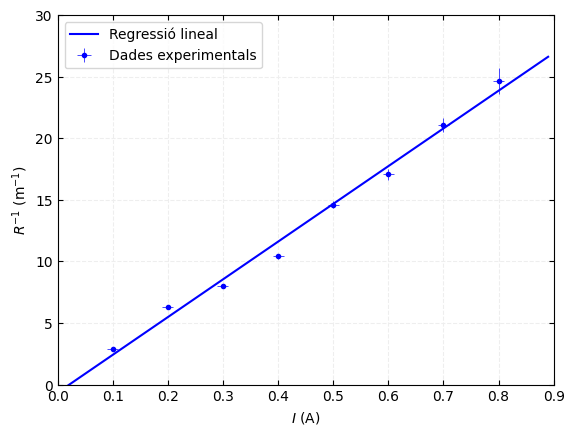

In [21]:
# regressio lineal: ajust de les dades a la recta y = A*X +B
A, B, R2 = fl.regressio(Is, Rs, graf=True)

vRs = fl.Variable('Rs', Rs, iRs)
vIs = fl.Variable('Is', Is, iIs)

# creem la figura
fig = plt.figure()
ax = fig.add_subplot()

fl.plotDades(ax,  vIs, vRs, label = 'Dades experimentals', color='b')


u = np.arange(0, 0.900, 0.01)

# representacio de la regresio lineal
plt.plot(u, A.val*u + B.val,label = 'Regressió lineal', c='b')

plt.xlabel('$I$ (A)')
plt.ylabel('$R^{-1}$ (m$^{-1}$)')
plt.xlim(0,0.9)
plt.ylim(0,30)
plt.legend()

print(f'A = {A.val} \pm {A.inc}')
print(f'B =  {B.val} \pm {B.inc}')

K = 32*np.pi*320*10**(-7)/(5*np.sqrt(5)*0.068)
vVa = fl.Variable('Va', 3000, 200)
qm_sim = 2*A.sim**2*vVa.sim/(K**2)
qm, iqm = fl.propIncertesa(qm_sim, [vVa,A])

print(f'q/m = {qm} \pm {iqm}')

#Desviació EM


In [22]:
# valors extrets de les imatges utilitzant PlotDigitizer

xVp = np.array([0.5, 1, 1.5, 1.9795918367346939, 2.4591836734693877, 3, 3.520408163265306, 3.9999999999999996, 4.520408163265306, 5.0102040816326525, 5.540816326530612, 6.030612244897958, 6.530612244897958, 7.030612244897958, 7.561224489795918, 8.03061224489796, 8.46938775510204, 9.020408163265305])
yVp = np.array([-0.09, -0.12, -0.13, -0.16, -0.16, -0.19, -0.21, -0.2, -0.21, -0.2, -0.18, -0.18, -0.13, -0.12, -0.1, -0.05, -0.01, 0.07])

xMag = np.array([0.5643564356435644, 0.9801980198019802, 1.504950495049505, 1.99009900990099, 2.504950495049505, 2.9603960396039604, 3.4752475247524752, 3.98019801980198, 4.455445544554456, 4.9405940594059405, 5.396039603960396, 5.871287128712871, 6.356435643564357, 6.8316831683168315, 7.297029702970297, 7.782178217821782, 8.247524752475247, 8.673267326732674])
yMag = np.array([-0.11111111111111112, -0.13131313131313133, -0.15151515151515152, -0.21212121212121213, -0.23232323232323235, -0.27272727272727276, -0.32323232323232326, -0.38383838383838387, -0.4646464646464647, -0.5353535353535354, -0.595959595959596, -0.6767676767676768, -0.7777777777777778, -0.8787878787878789, -0.9494949494949496, -1.0707070707070707, -1.1818181818181819, -1.292929292929293])


a_0 = -0.32679768431275535 \pm 0.0033772707320929114
a_1 = -0.001370055429405999 \pm 6.036802595551406e-05
R^2 = 0.9981772249462723


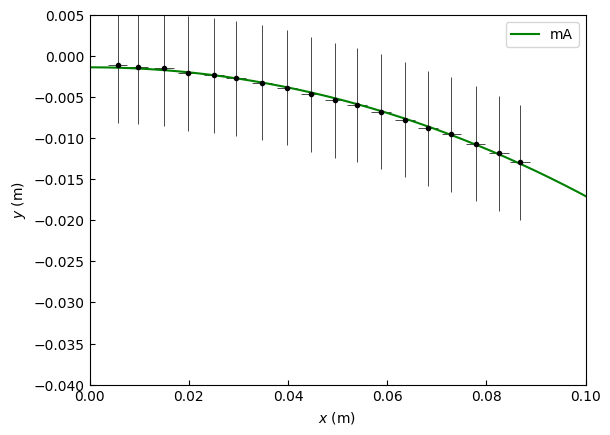

In [23]:

u = np.arange(0, 0.2, 0.001)

fig = plt.figure()
ax= fig.add_subplot()
ax.tick_params(direction='in')
ax.set_ylim(-0.04,0.005)
ax.set_xlim(0,0.1)


def func(x, R,B):
  return  R + np.sqrt(R**2-x**2) +B

curve = fl.curveFit(func, xMag/100, yMag/100, graf=True)

ax.errorbar(xMag/100,
              yMag/100,
              xerr = 0.002,
              yerr = 0.007,
              capsize = 0,
              elinewidth = 0.5,
              linewidth = 0,
              marker = 'o',
              markersize = 3,
              markerfacecolor = 'k',
              markeredgecolor = 'k',
              ecolor = 'k'
              )
plt.plot(u, func(u, curve[0][0], curve[0][1]),label = 'mA', c='g')
#print('I = '+ str(v[2]) + ' mA, R = ' + str(curve[0][0]) + ' b = ' + str(curve[0][1]) )
curve = fl.curveFit(func, xMag/100, yMag/100)

plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')

plt.legend()

Càlcul de q/m


In [24]:
k = fl.Variable('k',1.12,0.23)
Vp = fl.Variable('Vp', 1000, 200)
I = fl.Variable('I',0.1, 0.01)
R = fl.Variable('R',0.3268, 0.0034)
d = fl.Variable('d',0.054,0.001)
K = 32*np.pi*320*10**(-7)/(5*np.sqrt(5)*0.068)
vK = fl.Variable('K', K, 0)

qm = (k.sim*Vp.sim)/(d.sim*vK.sim**2*I.sim**2*R.sim)


fl.propIncertesa(qm,[k,Vp,I,R,d,vK])

(354462580421.146, 124124036593.557)